In [2]:
import pymses
ro = pymses.RamsesOutput("output", 28)

ro.info

Computing hilbert minimal domain description for output 28 ...
Done !


{'H0': 67.7900009155273,
 'aexp': 0.142859270653536,
 'boxlen': 1.0,
 'dom_decomp': <pymses.sources.ramses.hilbert.HilbertDomainDecomp at 0x6095dce50>,
 'dom_decomp_Hilbert_keys': array([  0.00000000e+00,   2.78507369e+15,   5.56949132e+15,
          8.31445109e+15,   9.90062483e+15,   1.10877759e+16,
          1.31167380e+16,   1.31170099e+16,   1.31170510e+16,
          1.31170643e+16,   1.31170680e+16,   1.31170689e+16,
          1.31171029e+16,   1.31172443e+16,   1.31172785e+16,
          1.31172793e+16,   1.31172793e+16,   1.39039160e+16,
          1.39043360e+16,   1.59558003e+16,   1.80143985e+16]),
 'levelmax': 17,
 'levelmin': 8,
 'ncpu': 20,
 'ndim': 3,
 'ngridmax': 10000000,
 'nstep_coarse': 3040,
 'omega_b': 0.0450000017881393,
 'omega_k': 2.98023223876953e-08,
 'omega_l': 0.691999971866608,
 'omega_m': 0.30799999833107,
 'ordering': 'hilbert',
 'time': -5.42775606861807,
 'unit_density': (9.12671643381e-25 m^-3.kg),
 'unit_length': (1.29814589144e+23 m),
 'unit_mag': (1.4

#### Q: why can time be -ve here?

A: because it's in lookback time.

In [3]:
ro.info['boxlen']/2**ro.info['levelmax']

7.62939453125e-06

In [8]:
from pymses.utils import constants as C
boxlen_pc = ro.info['boxlen'] * ro.info['unit_length'].express(C.pc)

In [9]:
boxlen_pc/2**ro.info['levelmax']      # this is snapshot-dependent, in the sim, resolution defined in co-moving scale.

32.09690179793066

### Read particles

epoch: 0.0 = ic particles; >0.0 = SF particles

In [3]:
# part = ro.particle_source(["vel", "mass", "id", "level", "epoch", "metal"])

#### Q: Is the num. of particles fixed? If so, if we are taking a snapshot at t > 0.0 after I.C., then does that mean that some of the I.C. particles (w/ epoch = 0.0) need to be "converted" into epoch > 0.0 particles, and that their properties such as vel, mass, metals are evolving through each snapshot?

A: not fixed (e.g., gas can be converted into stars over time). 

In [4]:
part = ro.particle_source(["vel", "id", "epoch", "mass"])
dset3 = part.get_domain_dset(3)      # read all particles of the CPU number 3

Reading particles : output/output_00028/part_00028.out00003


In [5]:
print "CPU 3 has %i particles" %dset3.npoints

CPU 3 has 2859162 particles


In [6]:
dset3.points     # particle coordinates

array([[  1.39156305e-01,   7.50529316e-01,   7.54667770e-01],
       [  1.87582470e-01,   7.50903303e-01,   7.41367693e-01],
       [  1.92231746e-01,   7.51659081e-01,   7.52903914e-01],
       ..., 
       [  3.96725626e-06,   9.81204894e-01,   6.79211924e-01],
       [  4.97409714e-01,   5.00009470e-01,   4.63525494e-01],
       [  4.83829179e-01,   5.00008831e-01,   4.80389831e-01]])

In [7]:
dset3["mass"]

array([  5.08961736e-08,   5.08961736e-08,   5.08961736e-08, ...,
         5.08961736e-08,   6.36202169e-09,   5.08961736e-08])

# Read in all particles

In [9]:

from pymses.filters import PointFunctionFilter

var_list    = ['vel',"id", "epoch", "mass"]
dset_all  = ro.particle_source(var_list)   

star_filter = lambda dset: dset["epoch"] != 0.0        
stars_dset_all  = PointFunctionFilter(star_filter, dset_all)      # apply the filter to the sourced set
stars_dset_all = stars_dset_all.flatten()

Read and filter time : 2.80 s
Reading particles : output/output_00028/part_00028.out00001
Reading particles : output/output_00028/part_00028.out00002
Reading particles : output/output_00028/part_00028.out00004
Reading particles : output/output_00028/part_00028.out00003
Reading particles : output/output_00028/part_00028.out00007Reading particles : output/output_00028/part_00028.out00008Reading particles : output/output_00028/part_00028.out00006Reading particles : output/output_00028/part_00028.out00005



Reading particles : output/output_00028/part_00028.out00010Reading particles : output/output_00028/part_00028.out00011Reading particles : output/output_00028/part_00028.out00019Reading particles : output/output_00028/part_00028.out00009



Reading particles : output/output_00028/part_00028.out00014Reading particles : output/output_00028/part_00028.out00013Reading particles : output/output_00028/part_00028.out00012


Reading particles : output/output_00028/part_00028.out00017Reading par

In [10]:
stars_dset_all.fields

{'epoch': array([-0.90348906, -0.90352993, -0.90332194, ..., -0.89222368,
        -0.89222368, -0.89222368]),
 'id': array([ 613700,  611821,  621639, ..., 1252503, 1252504, 1252505], dtype=int32),
 'mass': array([  1.82263124e-11,   1.71513361e-11,   1.89940742e-11, ...,
          2.45023683e-11,   2.45023683e-11,   2.45023683e-11]),
 'vel': array([[-0.00364282,  0.00664319,  0.00484701],
        [-0.00430897,  0.00330837,  0.00431681],
        [-0.00567844,  0.00416131,  0.00277015],
        ..., 
        [ 0.01358378,  0.0060721 ,  0.00574436],
        [-0.0099256 ,  0.00783373,  0.01246551],
        [-0.01080092,  0.01067168,  0.0110962 ]])}

In [8]:
large_memory = False

if large_memory:

    dset_all = part.flatten()          # not memeory-friendly, so I won't do it until I get access to CCA HPC
    print "Domain has %i particles" %dset_all.npoints

# Limited memory: load particles on cpu-by-cpu basis

In [9]:
for dset in part.iter_dsets():
    print dset.npoints

Reading particles : output/output_00028/part_00028.out00001
2519974
Reading particles : output/output_00028/part_00028.out00002
2375294
Reading particles : output/output_00028/part_00028.out00003
2859162
Reading particles : output/output_00028/part_00028.out00004
1962720
Reading particles : output/output_00028/part_00028.out00005
1613499
Reading particles : output/output_00028/part_00028.out00006
1736077
Reading particles : output/output_00028/part_00028.out00007
293245
Reading particles : output/output_00028/part_00028.out00008
233089
Reading particles : output/output_00028/part_00028.out00009
320639
Reading particles : output/output_00028/part_00028.out00010
417544
Reading particles : output/output_00028/part_00028.out00011
375766
Reading particles : output/output_00028/part_00028.out00012
425958
Reading particles : output/output_00028/part_00028.out00013
197671
Reading particles : output/output_00028/part_00028.out00014
396846
Reading particles : output/output_00028/part_00028.out00

#### Note that each CPU has different # of particles, guess not surprising for AMR.. but I am guessing this evolves with different snapshot since AMR is supposed to give more resolution to denser regions, which is a function of time?! So that probably also means that each CPU will be "load-balanced" at each snapshot..

Wait, but this is only the particle data, not the AMR data... hmm..

# Read in Hydro 

In [36]:
amr = ro.amr_source(['rho', 'vel', 'P'])

# Physical constants

In [11]:
from pymses.utils import constants as C
print C.kpc
print C.Msun

(3.085677e+19 m)
(1.9889e+30 kg)


In [12]:
factor = C.kpc.express(C.ly)   # from kpc to ly
print "1 kpc = %f ly" %factor

1 kpc = 3261.563163 ly


In [13]:
unit_density = 1.0E9 * C.Msun/C.kpc**3
print "1Msun/kpc**3 = %f H/cc" %unit_density.express(C.H_cc)

1Msun/kpc**3 = 30.993246 H/cc


# Read in only domains that intersecs region of interests (i.e., not all CPU files)

In [14]:
!cat output/output_00028/camera_28_[cut_13lev].csv      # from Andrea

In [15]:
line_of_sight_axis = [0.85882976970482816, 0.49834986636750128, -0.11856996820546729]
up_vector = [0.10255487134299716, 0.059509123032244614, 0.99294569974382518]
region_size = [0.0015, 0.0015] 
distance = 0.00075
far_cut_depth = 0.00075
map_max_size = 256
log_sensitive = True
perspectiveAngle = 0

In [16]:
from pymses.utils.regions import Sphere

center = [0.53103, 0.51031000000000004, 0.50402000000000002]
radius = 0.0015
region = Sphere(center, radius)

In [17]:
from pymses.filters import RegionFilter
from pymses import RamsesOutput

# particle filtering
filt_parts = RegionFilter(region, part)

# AMR data filtering
filt_amr = RegionFilter(region, amr)

# Filter by mass 

In [25]:
from pymses.filters import PointFunctionFilter

part_source = ro.particle_source(['mass'])

# stellar disk particles filter: only keep particles of mass = 3000.0 Msun
part_mass_Msun = 3.0E3 * C.Msun
part_mass_code = part_mass_Msun.express(ro.info["unit_mass"])
st_disc_func = lambda dset: (dset['mass'] == part_mass_code)

# Stellar disk particle data source
st_disc_parts = PointFunctionFilter(st_disc_func, part_source)


Read and filter time : 3.86 s
Reading particles : output/output_00028/part_00028.out00002
Reading particles : output/output_00028/part_00028.out00001
Reading particles : output/output_00028/part_00028.out00003
Reading particles : output/output_00028/part_00028.out00004
Reading particles : output/output_00028/part_00028.out00006Reading particles : output/output_00028/part_00028.out00008Reading particles : output/output_00028/part_00028.out00010Reading particles : output/output_00028/part_00028.out00005



Reading particles : output/output_00028/part_00028.out00011Reading particles : output/output_00028/part_00028.out00012Reading particles : output/output_00028/part_00028.out00014Reading particles : output/output_00028/part_00028.out00007



Reading particles : output/output_00028/part_00028.out00016Reading particles : output/output_00028/part_00028.out00017Reading particles : output/output_00028/part_00028.out00018Reading particles : output/output_00028/part_00028.out00009



Reading pa

In [28]:
newpoints = st_disc_parts.flatten()

Read and filter time : 2.46 s
Reading particles : output/output_00028/part_00028.out00003
Reading particles : output/output_00028/part_00028.out00001
Reading particles : output/output_00028/part_00028.out00002
Reading particles : output/output_00028/part_00028.out00004
Reading particles : output/output_00028/part_00028.out00008Reading particles : output/output_00028/part_00028.out00007Reading particles : output/output_00028/part_00028.out00006Reading particles : output/output_00028/part_00028.out00005



Reading particles : output/output_00028/part_00028.out00010Reading particles : output/output_00028/part_00028.out00009Reading particles : output/output_00028/part_00028.out00016Reading particles : output/output_00028/part_00028.out00011



Reading particles : output/output_00028/part_00028.out00014Reading particles : output/output_00028/part_00028.out00012Reading particles : output/output_00028/part_00028.out00013


Reading particles : output/output_00028/part_00028.out00018Reading par

In [31]:
newpoints.points

newpoints["mass"]

array([], dtype=float64)

# Camera and operator 

In [32]:
from pymses.analysis.visualization import Camera
cam = Camera(center=center, line_of_sight_axis=line_of_sight_axis, region_size=region_size, distance=distance, 
             far_cut_depth=far_cut_depth, up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)

In [33]:
cam_2 = Camera.from_csv("output/output_00028/camera_28_[cut_13lev].csv")

In [34]:
level_max = cam.get_required_resolution()

In [35]:
level_max

18

In [60]:
from pymses.analysis.visualization import SliceMap, ScalarOperator

rho_op = ScalarOperator(lambda dset: dset["rho"])    # get density slice

cam = Camera(center=center, line_of_sight_axis=[1,0,0], region_size=[0.1,0.1], distance=0.1, 
             far_cut_depth=0.1, up_vector=[0,1,0], map_max_size=512, log_sensitive=True)

map = SliceMap(amr, cam, rho_op, z=0.5)              # depth position

Reading amr data  : output/output_00028/amr_00028.out00001
Reading hydro     : output/output_00028/hydro_00028.out00001
Reading amr data  : output/output_00028/amr_00028.out00002
Reading hydro     : output/output_00028/hydro_00028.out00002
Reading amr data  : output/output_00028/amr_00028.out00003
Reading hydro     : output/output_00028/hydro_00028.out00003


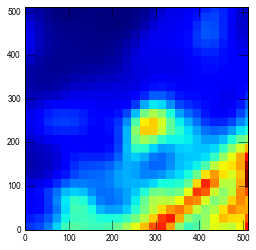

In [61]:
%matplotlib inline
import pylab as P
P.imshow(map)
P.show()

## So, the slice cut is very particular about the location (center) we pick in order to show the galaxy. Also, it doesn't care about the "distance" and "far_cut_depth" because it doesn't integrate (cf. FFT map). Also, it doesn't like taking a slice from non-standard angle (e.g., not along x,y,z axis).

# Use the FFT-convolved.. for the AMR data.

Processing map dict. (kernel size by kernel size 2D binning)
Reading amr data  : output/output_00028/amr_00028.out00008
Reading hydro     : output/output_00028/hydro_00028.out00008
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
npoints = 8455
Projection time = 0.002s
Level-by-level cell processing time = 0.009s
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00013
Reading hydro     : output/output_00028/hydro_0

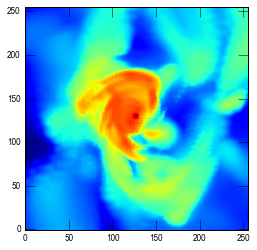

In [62]:
from numpy import array
import numpy as np
import pylab
from pymses.analysis.visualization import * 
from pymses import RamsesOutput
from pymses.utils import constants as C

# Map operator : mass-weighted density map, this section here is important!!! 
up_func = lambda dset: (dset["rho"]**2 * dset.get_sizes()**3) 
down_func = lambda dset: (dset["rho"] * dset.get_sizes()**3) 
scal_func = FractionOperator(up_func, down_func)

axes = {'los': line_of_sight_axis}
 
# Map processing
mp = fft_projection.MapFFTProcessor(amr, ro.info) 

for axname, axis in axes.items():
    cam  = Camera(center=center, line_of_sight_axis=axis, region_size=region_size, distance=distance/10., 
             far_cut_depth=far_cut_depth/10., up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)
    
    map = mp.process(scal_func, cam)
    factor = ro.info["unit_density"].express(C.H_cc)
    scale = ro.info["unit_length"].express(C.Mpc)

    P.imshow(np.log10(map))

## Try with different "distance" and "far_cut_depth".

Processing map dict. (kernel size by kernel size 2D binning)
Reading amr data  : output/output_00028/amr_00028.out00008
Reading hydro     : output/output_00028/hydro_00028.out00008
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
npoints = 2613
Projection time = 0.001s
Level-by-level cell processing time = 0.008s
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00013
Reading hydro     : output/output_00028/hydro_0

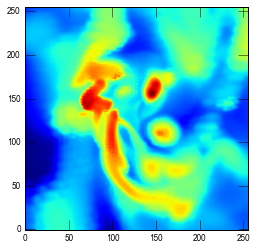

In [65]:
from numpy import array
import numpy as np
import pylab
from pymses.analysis.visualization import * 
from pymses import RamsesOutput
from pymses.utils import constants as C

# Map operator : mass-weighted density map
up_func = lambda dset: (dset["rho"]**2 * dset.get_sizes()**3) 
down_func = lambda dset: (dset["rho"] * dset.get_sizes()**3) 
scal_func = FractionOperator(up_func, down_func)      # scalarOperator

axes = {'los': line_of_sight_axis}
 
# Map processing
mp = fft_projection.MapFFTProcessor(amr, ro.info) 

cam  = Camera(center=center, line_of_sight_axis=axes['los'], region_size=region_size, distance=distance/100., 
             far_cut_depth=far_cut_depth/100., up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)

    
map = mp.process(scal_func, cam)
factor = ro.info["unit_density"].express(C.H_cc)
scale = ro.info["unit_length"].express(C.Mpc)

print distance * scale * 1.e3       # how much depth are we integrating?

P.imshow(np.log10(map))

# compare maps from different "distance" and "far_cut_depth"

3.15525383434
Processing map dict. (kernel size by kernel size 2D binning)
Reading amr data  : output/output_00028/amr_00028.out00008
Reading hydro     : output/output_00028/hydro_00028.out00008
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
npoints = 65433
Projection time = 0.007s
Level-by-level cell processing time = 0.040s
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00013
Reading hydro     : output/outpu

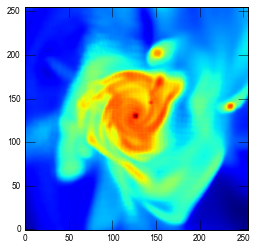

In [66]:
cam  = Camera(center=center, line_of_sight_axis=axes['los'], region_size=region_size, distance=distance, 
             far_cut_depth=far_cut_depth, up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)
print distance * scale * 1.e3       # how much depth are we integrating?
    
map = mp.process(scal_func, cam)
P.imshow(np.log10(map))

31.5525383434
Processing map dict. (kernel size by kernel size 2D binning)
Reading amr data  : output/output_00028/amr_00028.out00007
Reading hydro     : output/output_00028/hydro_00028.out00007
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00008
Reading hydro     : output/output_00028/hydro_00028.out00008
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
npoints = 8869
Projection time = 0.003s
Level-by-level cell processing time = 0.011s
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
npoints = 3861
Projection time = 0.005s
Level-by-level cell processing time = 0.010s
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
npoints = 116070
Projection time = 0.011s
Level-by-level cell processing time = 0

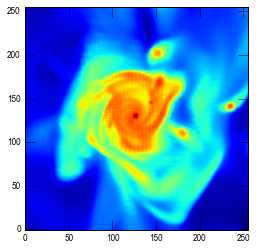

In [71]:
cam  = Camera(center=center, line_of_sight_axis=axes['los'], region_size=region_size, distance=distance*10., 
             far_cut_depth=far_cut_depth*10., up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)
print distance*10. * scale * 1.e3       # how much depth are we integrating?
    
mapp = mp.process(scal_func, cam)
P.imshow(np.log10(mapp))

In [69]:
save_map_HDF5?

In [73]:
# save map to HDF5 file
mapname = "gas_LOS_00028_dist31kpc"
h5fname = save_map_HDF5(mapp, cam, map_name=mapname)

# plot map into matplotlib figure image
fig = save_HDF5_to_plot(h5fname, map_unit=("H/cc", factor), axis_unit=("Mpc", scale))

Saving map into './gas_LOS_00028_dist31kpc.h5.h5' HDF5 file


OSError: [Errno 17] File exists: './'

# Particle map

Processing map dict. (kernel size by kernel size 2D binning)
Reading particles : output/output_00028/part_00028.out00008
No interesting point in this dataset
Reading particles : output/output_00028/part_00028.out00009
No interesting point in this dataset
Reading particles : output/output_00028/part_00028.out00010
No interesting point in this dataset
Reading particles : output/output_00028/part_00028.out00011
npoints = 49648
Projection time = 0.002s
Level-by-level cell processing time = 0.019s
Reading particles : output/output_00028/part_00028.out00012
No interesting point in this dataset
Reading particles : output/output_00028/part_00028.out00013
No interesting point in this dataset
Reading particles : output/output_00028/part_00028.out00014
npoints = 20119
Projection time = 0.004s
Level-by-level cell processing time = 0.009s
Reading particles : output/output_00028/part_00028.out00015
npoints = 146022
Projection time = 0.008s
Level-by-level cell processing time = 0.033s
Reading particl

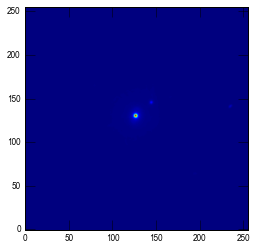

In [76]:
ioutput = 28
parts = ro.particle_source(["mass", "level"])

# map operator: mass
scal_func = ScalarOperator(lambda dset: dset["mass"])     # simple, plot the mass

# Map region
center = center
axes = {"los": line_of_sight_axis}

# Map processing
mp = fft_projection.MapFFTProcessor(parts, ro.info)

cam = Camera(center=center, line_of_sight_axis=line_of_sight_axis, region_size=region_size, distance=distance, 
             far_cut_depth=far_cut_depth, up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)
map = mp.process(scal_func, cam, surf_qty=True)
    
P.imshow(map)

# Ray-traced maps

dsets to process: 11
Ray trace process time = 4.472s
Calculated ray lengths during the ray trace process are all equal : visualized volume is complete ! :-)
Reading amr data  : output/output_00028/amr_00028.out00004
Reading amr data  : output/output_00028/amr_00028.out00008
Reading amr data  : output/output_00028/amr_00028.out00009
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00004Reading hydro     : output/output_00028/hydro_00028.out00008Reading hydro     : output/output_00028/hydro_00028.out00009Reading hydro     : output/output_00028/hydro_00028.out00010



Reading amr data  : output/output_00028/amr_00028.out00015Reading amr data  : output/output_00028/amr_00028.out00013Reading amr data  : output/output_00028/amr_00028.out00011Reading amr data  : output/output_00028/amr_00028.out00012



Reading hydro     : output/output_00028/hydro_00028.out00015Reading hydro     : output/output_00028/hydro_00028.out00013Reading

/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/analysis/visualization/raytracing/ray_trace_maps.py:161: FutureWarning: comparison to `None` will result in an elementwise object comparison in the fu

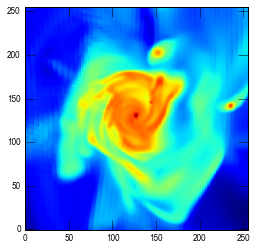

In [80]:
# Density map
from numpy import array
import pylab
from pymses.analysis.visualization import * 
from pymses import RamsesOutput
from pymses.utils import constants as C

# Map operator : mass-weighted density map
up_func = lambda dset: (dset["rho"]**2) 
down_func = lambda dset: (dset["rho"])
scal_op = FractionOperator(up_func, down_func)

# Map processing
rt = raytracing.RayTracer(ro, ["rho"]) 
cam  = Camera(center=center, line_of_sight_axis=axes['los'], up_vector="z", region_size=region_size, 
                        distance=distance, far_cut_depth=far_cut_depth, map_max_size=map_max_size)
                                                                                  
map = rt.process(scal_op, cam)
factor = ro.info["unit_density"].express(C.H_cc)
scale = ro.info["unit_length"].express(C.Mpc)

P.imshow(np.log10(map))

## try using up_vector = our predefined up_vector instead of z-axis.

dsets to process: 11
Ray trace process time = 2.869s
Calculated ray lengths during the ray trace process are all equal : visualized volume is complete ! :-)
Reading amr data  : output/output_00028/amr_00028.out00004
Reading amr data  : output/output_00028/amr_00028.out00008
Reading amr data  : output/output_00028/amr_00028.out00009
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00004Reading hydro     : output/output_00028/hydro_00028.out00008Reading hydro     : output/output_00028/hydro_00028.out00009Reading hydro     : output/output_00028/hydro_00028.out00010



Reading amr data  : output/output_00028/amr_00028.out00016Reading amr data  : output/output_00028/amr_00028.out00013Reading amr data  : output/output_00028/amr_00028.out00011Reading amr data  : output/output_00028/amr_00028.out00012



Reading hydro     : output/output_00028/hydro_00028.out00016
Reading hydro     : output/output_00028/hydro_00028.out00013
Readi

/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/analysis/visualization/raytracing/ray_trace_maps.py:161: FutureWarning: comparison to `None` will result in an elementwise object comparison in the fu

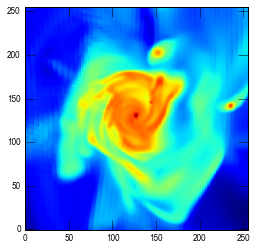

In [81]:
# Map processing
rt = raytracing.RayTracer(ro, ["rho"]) 
cam  = Camera(center=center, line_of_sight_axis=axes['los'], up_vector=up_vector, region_size=region_size, 
                        distance=distance, far_cut_depth=far_cut_depth, map_max_size=map_max_size)
                                                                                  
map = rt.process(scal_op, cam)
factor = ro.info["unit_density"].express(C.H_cc)
scale = ro.info["unit_length"].express(C.Mpc)

P.imshow(np.log10(map))